# Ford GoBike System Data

**Introduction**

In this presentation I will present some observations and conclusion regarding the Ford GoBike System Dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#As the number of missing values cells is not large I choose to delete this rows from the data 
df.dropna(inplace=True)

In [5]:
#Convert the data type of (start_time & end_time) to datatime instead of string
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
#Convert the data type of (start_station_id & end_station_id) to int instead of float
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

In [7]:
#Convert the data type of (member_birth_year) to int instead of float
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [8]:
#I will drop this row to not affect negatively on the accuracy of data exploring
df = df.drop(27370)

**1- The total members of males are much more than females.**

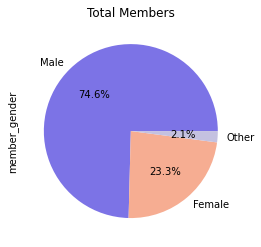

In [9]:
Labels = ['Male', 'Female', 'Other']
Colors = ['#7C73E6','#F6AD92','#C4C1E0']
df['member_gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = Colors, labels = Labels);
plt.title('Total Members')
plt.show()

**2- The most of users are subscribers not customers.**

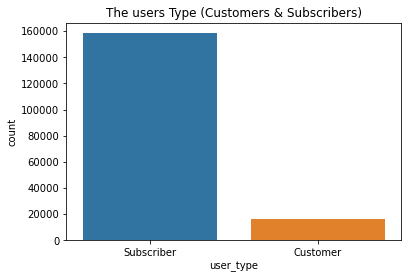

In [10]:
order = df['user_type'].value_counts().index
sb.countplot(data=df, x= 'user_type', order=order);
plt.title('The users Type (Customers & Subscribers)');

**3- The most trips durations are less than 10 minutes.**

In [11]:
df['duration_sec'] = df['duration_sec'].astype(int)

In [12]:
#Create if Function to sort the trips durations into specific categories
def Trip_Dura (duration_sec):
    if duration_sec <= 600:
        return 'below 10 min'
    elif duration_sec <= 1200 >600:
        return '10 to 20 min'
    elif duration_sec <= 1800 >1200:
        return '20 to 30 min'
    elif duration_sec <= 2400 >1800:
        return '30 to 40 min'
    elif duration_sec <= 3000 >2400:
        return '40 to 50 min'
    elif duration_sec <= 3600 >3000:
        return '50 to 60 min'
    elif duration_sec >3600:
        return 'Above 60 min'
df['Trip_Dura'] = df.apply(lambda x: Trip_Dura(x['duration_sec']), axis=1)

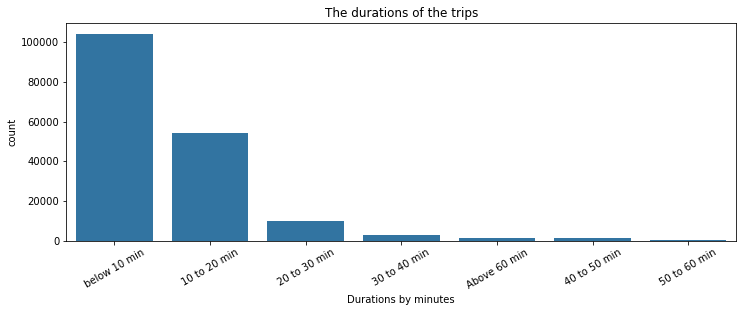

In [13]:
plt.figure(figsize = [12, 4]) 
base_color = sb.color_palette()[0]
ored = df['Trip_Dura'].value_counts().index
sb.countplot(data=df, x= 'Trip_Dura', color=base_color, order=ored);
plt.xlabel('Durations by minutes')
plt.title('The durations of the trips')
plt.xticks(rotation=30)
plt.show()

In [14]:
com_stat = df['start_station_name'].mode()[0]
Com_end = df['end_station_name'].mode()[0]
print('The most common start station is {}'.format(com_stat))
print('The most common end station is {}'.format(Com_end))

The most common start station is Market St at 10th St
The most common end station is San Francisco Caltrain Station 2  (Townsend St at 4th St)


In [15]:
#split the Date and Time of start time column into columns to be able to get some insights from it.
df['S_year'] = df['start_time'].dt.year
df['S_month'] = df['start_time'].dt.month
df['S_day'] = df['start_time'].dt.day
df['S_hour'] = df['start_time'].dt.hour

In [16]:
#Ceck The number of years that the dataset contain
df['S_year'].unique()[0]

2019

In [17]:
df['S_month'].unique()[0]

2

The dataset contain only the february month of 2019.

**4- Females and other gender have a longer trip duration than males.**

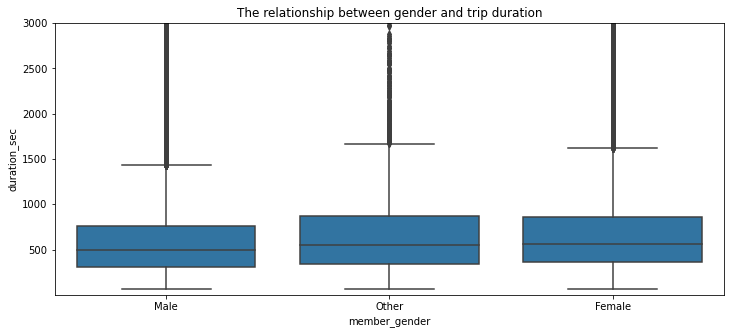

In [18]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color =base_color);
plt.ylim([1, 3000])
plt.title('The relationship between gender and trip duration');

**5- The rush hours are the same for subscribers & customers and they are 8/9 am and 5/6 pm.**

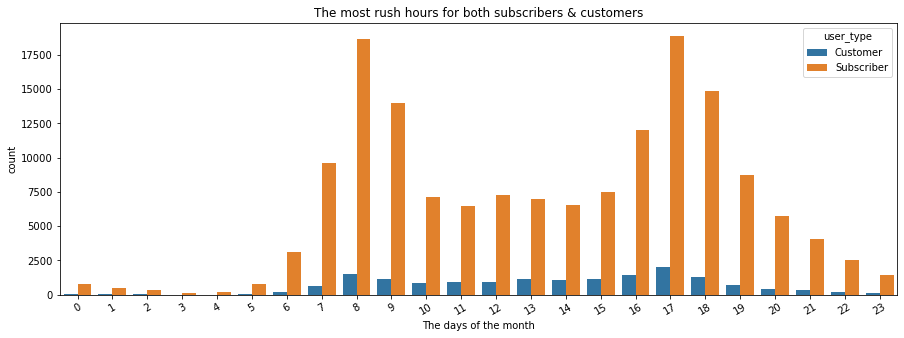

In [19]:
plt.figure(figsize = [15, 5]) 
bins = np.arange(1, df['S_hour'].max()+6, 6)
sb.countplot(data = df, x = 'S_hour', hue = 'user_type');
plt.xlabel('The days of the month')
plt.title('The most rush hours for both subscribers & customers')
plt.xticks(rotation=30);

**6- Customers have a longer trip duration than subscribers during the month.**

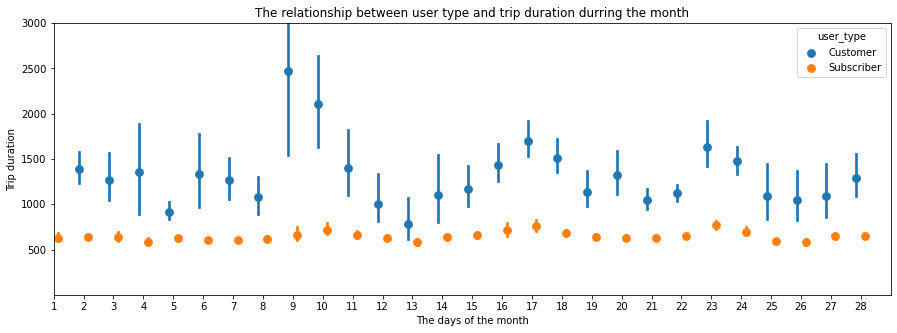

In [20]:
plt.figure(figsize = [15,5])
sb.pointplot(data=df, x='S_day', y='duration_sec', hue='user_type', dodge=0.3, linestyles="");
plt.ylim([1, 3000])
plt.xlim([0, 28])
plt.ylabel('Trip duration');
plt.xlabel('The days of the month');
plt.title('The relationship between user type and trip duration durring the month');

In [21]:
#Create a new column of the members ages to be easier to use than the birth year
from datetime import date
def Member_Age(member_birth_year):
    today = date.today()
    return today.year - member_birth_year
df['Member_Age'] = df.apply(lambda x: Member_Age(x['member_birth_year']), axis=1)

In [ ]:
!jupyter nbconvert SlideDeck.ipynb --to slides --post serve --no-input --no-prompt